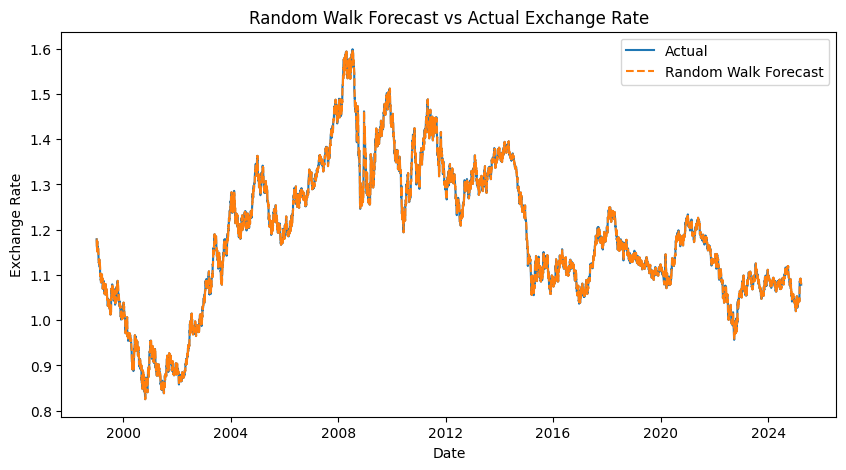

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('usd_exchange_rates.csv')
df['date'] = pd.to_datetime(df['TIME_PERIOD'])
df['value'] = df['OBS_VALUE'].astype(float)
df = df.sort_values('date').reset_index(drop=True)

# Set forecast horizon (e.g., 1-day ahead)
df['random_walk_forecast'] = df['value'].shift(1)  # Today's forecast is yesterday's actual value

# Drop first row (no forecast possible for first observation)
df = df.dropna().reset_index(drop=True)

# Plot actual vs. forecast
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['value'], label='Actual')
plt.plot(df['date'], df['random_walk_forecast'], label='Random Walk Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.title('Random Walk Forecast vs Actual Exchange Rate')
plt.show()

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# MSE
mse = mean_squared_error(df['value'], df['random_walk_forecast'])
# RMSE
rmse = np.sqrt(mse)
# MAE
mae = mean_absolute_error(df['value'], df['random_walk_forecast'])
# MAPE
mape = np.mean(np.abs((df['value'] - df['random_walk_forecast']) / df['value'])) * 100

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 0.000049
Root Mean Squared Error (RMSE): 0.007012
Mean Absolute Error (MAE): 0.005096
Mean Absolute Percentage Error (MAPE): 0.43%


In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Read your data
df = pd.read_csv('usd_exchange_rates.csv')
df['date'] = pd.to_datetime(df['TIME_PERIOD'])
df['value'] = df['OBS_VALUE'].astype(float)
df = df.sort_values('date').reset_index(drop=True)

# Run ADF test on the 'value' column
result = adfuller(df['value'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value:.3f}')

if result[1] < 0.05:
    print("The data is likely stationary (reject H0).")
else:
    print("The data is likely non-stationary (fail to reject H0).")


ADF Statistic: -1.797633
p-value: 0.381638
Critical Value 1%: -3.431
Critical Value 5%: -2.862
Critical Value 10%: -2.567
The data is likely non-stationary (fail to reject H0).


Training data: 5375 rows
Testing data: 1344 rows
Train range: 1999-01-04 00:00:00 to 2019-12-31 00:00:00
Test range: 2020-01-02 00:00:00 to 2025-03-27 00:00:00

--- ADF Test on Full Series ---
ADF Statistic: -1.7976328570008804
p-value: 0.38163754611334433
Critical Value 1%: -3.431
Critical Value 5%: -2.862
Critical Value 10%: -2.567
The data is likely non-stationary (fail to reject H0).

--- Forecast Metrics on Test Set ---
Mean Squared Error (MSE): 0.000027
Root Mean Squared Error (RMSE): 0.005197
Mean Absolute Error (MAE): 0.003841
Mean Absolute Percentage Error (MAPE): 0.35%


C:\Users\alius\AppData\Local\Temp\ipykernel_4052\290978489.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['random_walk_forecast'].iloc[1:] = test['value'].iloc[:-1].values


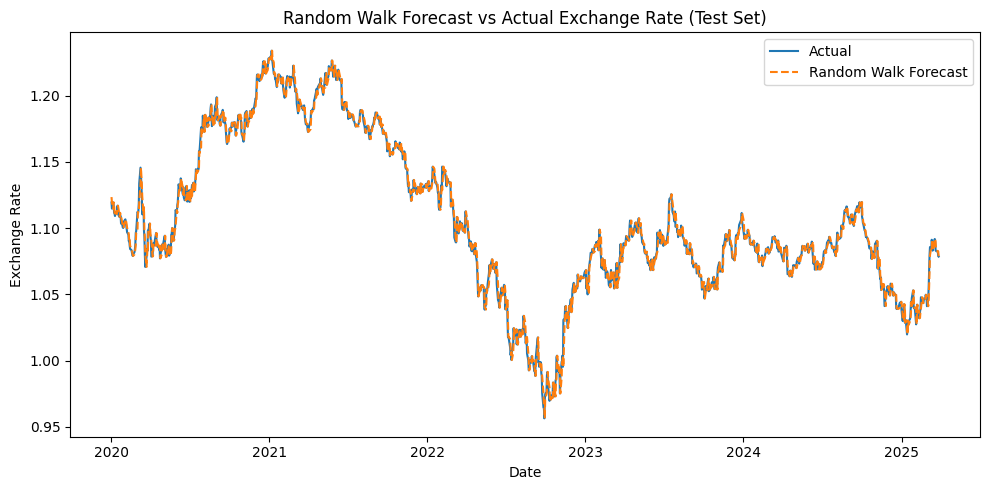

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Load and sort the data
df = pd.read_csv('usd_exchange_rates.csv')
df['date'] = pd.to_datetime(df['TIME_PERIOD'])
df['value'] = df['OBS_VALUE'].astype(float)
df = df.sort_values('date').reset_index(drop=True)

# 2. Split data into 80% train, 20% test
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx].reset_index(drop=True)
test = df.iloc[split_idx:].reset_index(drop=True)

print(f"Training data: {len(train)} rows")
print(f"Testing data: {len(test)} rows")
print("Train range:", train['date'].min(), "to", train['date'].max())
print("Test range:", test['date'].min(), "to", test['date'].max())

# 3. Stationarity check on the whole series (ADF test)
adf_result = adfuller(df['value'])
print('\n--- ADF Test on Full Series ---')
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'Critical Value {key}: {value:.3f}')
if adf_result[1] < 0.05:
    print("The data is likely stationary (reject H0).")
else:
    print("The data is likely non-stationary (fail to reject H0).")

# 4. Implement random walk forecast on the test set
# Use the last value from train as the first forecast for test
test = test.copy()
test['random_walk_forecast'] = np.nan
test.at[0, 'random_walk_forecast'] = train['value'].iloc[-1]
test['random_walk_forecast'].iloc[1:] = test['value'].iloc[:-1].values

# 5. Calculate evaluation metrics
# Drop the first row of test (no previous value to forecast)
test_metrics = test.dropna().reset_index(drop=True)

mse = mean_squared_error(test_metrics['value'], test_metrics['random_walk_forecast'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_metrics['value'], test_metrics['random_walk_forecast'])
mape = np.mean(np.abs((test_metrics['value'] - test_metrics['random_walk_forecast']) / test_metrics['value'])) * 100

print('\n--- Forecast Metrics on Test Set ---')
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 6. Plot actual vs forecasted values on test set
plt.figure(figsize=(10,5))
plt.plot(test_metrics['date'], test_metrics['value'], label='Actual')
plt.plot(test_metrics['date'], test_metrics['random_walk_forecast'], label='Random Walk Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Random Walk Forecast vs Actual Exchange Rate (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()


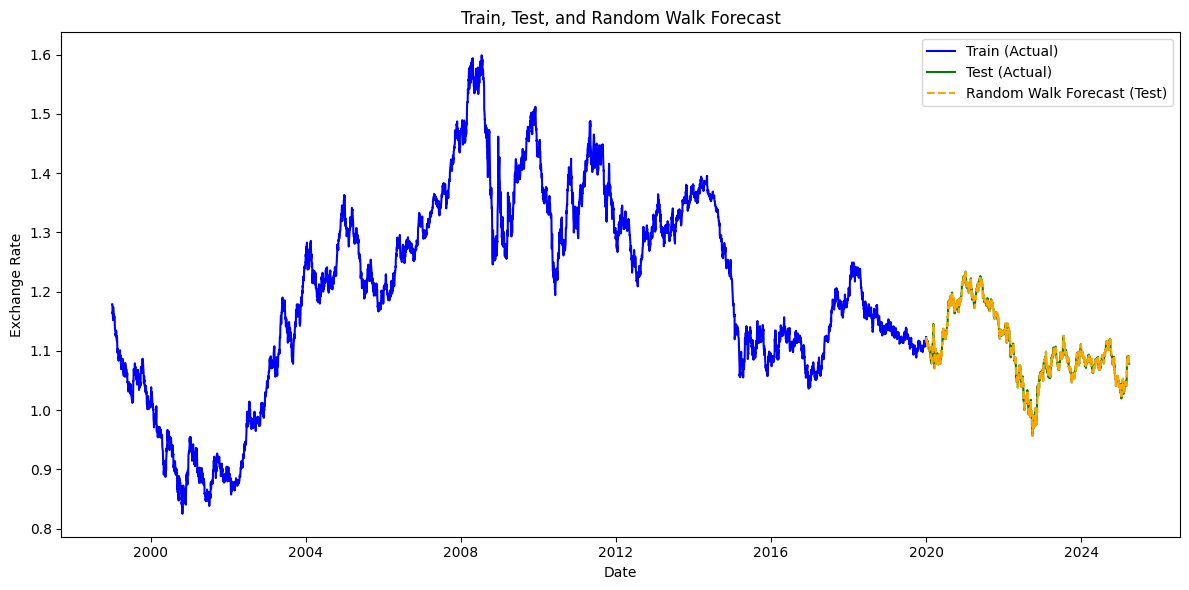

In [6]:
plt.figure(figsize=(12,6))

# Plot train set
plt.plot(train['date'], train['value'], label='Train (Actual)', color='blue')

# Plot test set (actual)
plt.plot(test['date'], test['value'], label='Test (Actual)', color='green')

# Plot test set forecast (only from index 1 onward, since first forecast is after the last train value)
plt.plot(test['date'], test['random_walk_forecast'], label='Random Walk Forecast (Test)', color='orange', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Train, Test, and Random Walk Forecast')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Save the test set with forecasts to a CSV file
test.to_csv('random_walk_forecast_output.csv', index=False)
print("Forecast data saved to 'random_walk_forecast_output.csv'")


Forecast data saved to 'random_walk_forecast_output.csv'
